In [5]:
import os
os.chdir("../..")

In [1]:
from scipy import stats
import pandas as pd

In [2]:
def get_outliers_thresholds(column, only_positive=False):
    column = column.copy()
    column = column.dropna()
    iqr = stats.iqr(column, nan_policy="raise")
    median = column.median()
    lower_bound = median - 1.5*iqr
    if only_positive:
        lower_bound = max(lower_bound, 0)
    upper_bound = median + 1.5*iqr
    if only_positive:
        upper_bound = max(upper_bound, 0)
    return lower_bound, upper_bound

In [3]:
def cut_outliers(column):
    column = column.copy()
    lower_bound, upper_bound = get_outliers_thresholds(column, only_positive=True)
    column.loc[column < lower_bound] = lower_bound
    column.loc[column > upper_bound] = upper_bound
    return column

In [6]:
X = pd.read_parquet("resources/data/clean/X_train.parquet")

In [8]:
column = "annual_inc"

<AxesSubplot:>

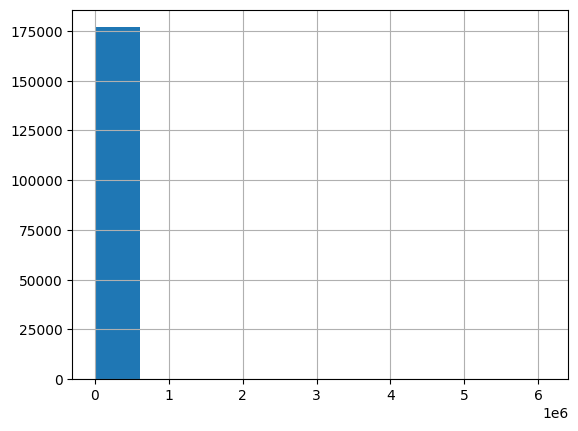

In [12]:
X[column].hist()

In [11]:
get_outliers_thresholds(X[column], True)

(0, 125000.0)

<AxesSubplot:>

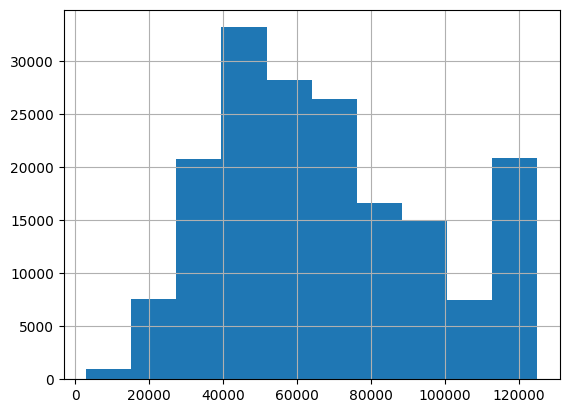

In [13]:
cut_outliers(X[column]).hist()